<a href="https://colab.research.google.com/github/campusplage/compte-rendus-mullier_alberjaoui/blob/master/TP1_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyse de données multidimensionnelles
## BRUN Fleur & FRANC Priscille

# TP 1: `pandas` et visualisation


---
Ce notebook contient votre compte-rendu pour le TP1.
Il s'agit d'un travail que nous commencerons ensemble, puis que vous pouvez continuer de votre côté jusqu'à la date limite de soumission qui est le __lundi 2 décembre à 6h__.

---

# 1. Manipuler github et soumettre votre travail (5 points)

> Vous serez notés sur votre aptitude à correctement soumettre votre travail par le biais d'un gestionnaire de version.

## a. Ouvrir votre travail

Vous avez deux options pour ouvrir votre notebook:
  * Sur la page de votre répo, cliquez dessus puis `open in colab`
  * directement sur [colab.research.google.com](colab.research.google.com), cliquez sur `File` $\rightarrow$ `Open notebook`, puis choisissez l'onglet `github` et retrouvez le colab après avoir sélectionné le bon répo.


## b. Sauvegarder votre travail

Vous êtes invités à régulièrement sauvegarder votre travail sur le répo (et non pas sur votre google drive uniquement).

Pour cela:
1. Cliquez sur `File` $\rightarrow$ `Save a copy in github`
2. Si c'est la première fois que vous le faites, autorisez l'accès à google colab l'accès à votre compte github. Suivez simplement les instructions.
3. Ensuite, sur la page qui s'affiche, sélectionnez le répo de votre compte rendu, puis `OK`. Appelez votre notebook `TP1.ipynb`.
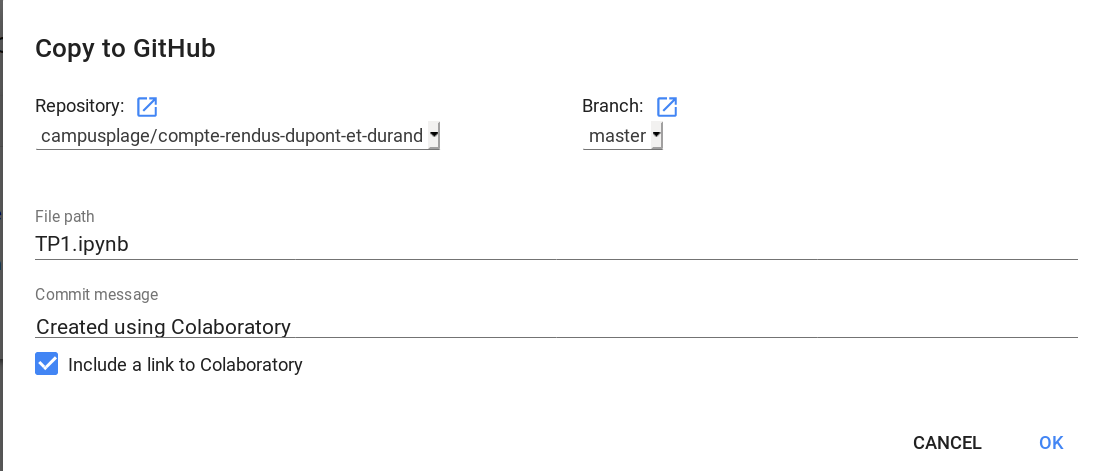

> Vous êtes chaleureusement invités à donner un message informatif pour décrire chaque `commit`, et donc à changer ce _created using colaboratory_ qui s'affiche par défaut. (Cela fera bien sûr partie des critères de notation).

## c. Récupérer une version plus ancienne

L'intérêt principal de travailler avec un gestionnaire de version comme git est de pouvoir à tout moment revenir en arrière !

Si vous en avez besoin, parcourez les différents _commits_ de votre répo, et chargez les fichiers correspondants.  
Tout est sauvegardé sur github ! C'est un énorme avantage par rapport à un google drive, un dropbox, un fichier en local, etc.

# 2. Charger des données (2 points)


1. Créez un `DataFrame` appelé `raw_data` à partir du fichier suivant:
https://husson.github.io/img/pluie.csv 
2. Renommez la première colonne `Ville` et utilisez-la en index
3. Affichez les premières lignes de la structure créée

> Modifiez la cellule suivante pour effectuer ces opérations

In [7]:
# on importe le package pandas
import pandas

# on importe les données à partir du fichier indiqué
raw_data = pandas.read_csv('https://husson.github.io/img/pluie.csv',
                       encoding = "ISO-8859-1", sep=';')

# on renomme la première colonne: "Ville"
raw_data = raw_data.rename(columns={raw_data.columns[0]: 'Ville'})

# utilisons le nom de la ville comme indicateur de ligne ou 'index'
raw_data = raw_data.set_index('Ville')

# affichons les premières lignes 
raw_data.head()


,JANVIERp,FEVRIERp,MARSp,AVRILp,MAIp,JUINp,JUILLETp,AOUTp,SEPTEMBREp,OCTOBREp,NOVEMBREp,DECEMBREp,Précipitations annuelles,JANVIERnb.j.pl,FEVRIERnb.j.pl,MARSnb.j.pl,AVRILnb.j.pl,MAInb.j.pl,JUINnb.j.pl,JUILLETnb.j.pl,AOUTnb.j.pl,SEPTEMBREnb.j.pl,OCTOBREnb.j.pl,NOVEMBREnb.j.pl,DECEMBREnb.j.pl,Nombre annuel de jours de pluie,Température moyenne annuelle,Amplitude annuelle des températures,Insolation annuelle,Latitude,Longitude,Précipitations de mai à aout,Précipitations sept-oct,Géographie
Ville,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Ajaccio,78.0,69.0,51.0,39.0,43.0,23.0,10.0,15.0,43.0,81.0,105.0,96.0,653.0,12.0,10.0,9.0,9.0,8.0,4.0,1.0,2.0,6.0,10.0,11.0,13.0,95.0,14.71,14.5,2811.0,41.55,8.44,13.9,25.8,Sud
Angers,65.0,50.0,60.0,45.0,50.0,55.0,35.0,60.0,55.0,65.0,80.0,70.0,690.0,16.0,13.0,12.0,12.0,13.0,10.0,11.0,11.0,12.0,13.0,15.0,16.0,154.0,11.28,14.5,1899.0,47.28,-0.33,29.0,30.8,Ouest
Angoulème,79.0,68.0,64.0,62.0,70.0,58.0,53.0,66.0,69.0,70.0,79.0,88.0,826.0,16.0,14.0,13.0,12.0,14.0,11.0,12.0,12.0,12.0,13.0,15.0,16.0,160.0,12.02,14.9,1989.0,45.39,0.09,29.9,31.0,Ouest
Besançon,94.0,87.0,75.0,74.0,86.0,107.0,80.0,116.0,106.0,78.0,92.0,93.0,1088.0,17.0,14.0,12.0,14.0,14.0,14.0,14.0,13.0,13.0,14.0,15.0,15.0,169.0,10.04,17.6,1897.0,47.15,6.02,35.8,35.5,Est
Biarritz,128.0,105.0,98.0,102.0,100.0,91.0,69.0,123.0,155.0,152.0,175.0,176.0,1474.0,16.0,14.0,13.0,15.0,17.0,14.0,13.0,13.0,14.0,15.0,16.0,17.0,177.0,13.58,12.3,1921.0,43.29,-1.34,26.0,36.8,Ouest


Executez ensuite le code suivant, et commentez à chaque fois qu'il y a marqué "Commentez".

In [8]:
# on enregistre les 12 noms de mois dans une liste 'months'
months = ['Janvier', 'Février', 'Mars', 'Avril', 'Mai', 'Juin', 'Juillet',
          'Août', 'Septembre', 'Octobre', 'Novembre', 'Décembre']

# on crée une liste avec les noms des deux grandeurs enregistrées pour chaque mois de l'année dans le dataframe raw_data
types = ['Précipitations', 'Jours de pluie']
         
# on crée un multi index à partir des combinaisons possibles des listes que l'on vient de créer 
index = pandas.MultiIndex.from_product((types, months),
                                       names=['Grandeur', 'Mois'])

# on imbrique deux listes: une qui va de 0 à 11 et une de 13 à 24
nested_columns = list(range(12)) + list(range(13, 25))

# on crée une DataFrame, avec un multi-index pour ces colonnes imbriquées
data = pandas.DataFrame(raw_data.iloc[:,nested_columns].to_numpy(), columns=index)

# On réaffecte l'index de la base de départ à cette nouvelle base de données
data = data.set_index(raw_data.index)

# on récupère les autres colonnes et on les ajoute à la nouvelle base
other_columns = ['Température moyenne annuelle', 'Amplitude annuelle des températures',
                 'Insolation annuelle', 'Latitude', 'Longitude', 'Géographie']
data[other_columns] = raw_data[other_columns]

# Affichage
data.head()

Grandeur  Précipitations                ... Latitude Longitude Géographie
Mois             Janvier Février  Mars  ...                              
Ville                                   ...                              
Ajaccio             78.0    69.0  51.0  ...    41.55      8.44        Sud
Angers              65.0    50.0  60.0  ...    47.28     -0.33      Ouest
Angoulème           79.0    68.0  64.0  ...    45.39      0.09      Ouest
Besançon            94.0    87.0  75.0  ...    47.15      6.02        Est
Biarritz           128.0   105.0  98.0  ...    43.29     -1.34      Ouest

[5 rows x 30 columns]

Comme vous le constatez, `pandas` est en fait encore plus puissant que ce que je vous ai raconté: on peut avoir des index imbriqués, à la fois pour les lignes et pour les colonnes. Cela peut s'avérer très pratique pour manipuler des données réellement compliquées.

> En pratique, cela signifie qu'une colonne donnée d'un `DataFrame` n'est pas forcément un objet `Series`, contrairement à ce que je vous avais dit à des fins pédagogiques.

> Dans le code ci-dessus, on a éliminé les colonnes redondantes (qu'on peut calculer simplement à partir des données)

# 3. Indiçage (3 points)

À ce stade, vous devriez disposer d'un objet `data`, qui regroupe les données dans un `DataFrame`. 

> Dans chacune des cellules suivantes, écrivez le code nécessaire à répondre à la question posée.

In [9]:
# Affichez seulement les précipitations mensuelles de toutes les villes
data.Précipitations

Mois,Janvier,Février,Mars,Avril,Mai,Juin,Juillet,Août,Septembre,Octobre,Novembre,Décembre
Ville,,,,,,,,,,,,
Ajaccio,78.0,69.0,51.0,39.0,43.0,23.0,10.0,15.0,43.0,81.0,105.0,96.0
Angers,65.0,50.0,60.0,45.0,50.0,55.0,35.0,60.0,55.0,65.0,80.0,70.0
Angoulème,79.0,68.0,64.0,62.0,70.0,58.0,53.0,66.0,69.0,70.0,79.0,88.0
Besançon,94.0,87.0,75.0,74.0,86.0,107.0,80.0,116.0,106.0,78.0,92.0,93.0
Biarritz,128.0,105.0,98.0,102.0,100.0,91.0,69.0,123.0,155.0,152.0,175.0,176.0
Bordeaux,100.0,84.0,66.0,57.0,64.0,71.0,52.0,65.0,88.0,84.0,99.0,117.0
Brest,130.0,98.0,89.0,77.0,74.0,60.0,51.0,80.0,95.0,108.0,136.0,159.0
Caen,65.0,61.0,45.0,44.0,53.0,52.0,45.0,57.0,66.0,75.0,79.0,71.0
Clermont-Fd,28.0,27.0,30.0,41.0,78.0,79.0,48.0,70.0,58.0,43.0,39.0,30.0


In [10]:
# Affichez le nombre de jours de pluie de toutes les villes pour les mois de "Juin", "Juillet" et "Août"
data.Précipitations[['Juin','Juillet', 'Août']]

Mois,Juin,Juillet,Août
Ville,,,
Ajaccio,23.0,10.0,15.0
Angers,55.0,35.0,60.0
Angoulème,58.0,53.0,66.0
Besançon,107.0,80.0,116.0
Biarritz,91.0,69.0,123.0
Bordeaux,71.0,52.0,65.0
Brest,60.0,51.0,80.0
Caen,52.0,45.0,57.0
Clermont-Fd,79.0,48.0,70.0


In [11]:
# Affichez une phrase qui indique la latitude et longitude d'Angoulème.
# (utilisez `loc` et le formattage de chaines de caractère avec print)

print("\nLes coordonnées d Angoulème sont :\n" , data.loc['Angoulème', ['Latitude','Longitude']])



Les coordonnées d Angoulème sont :
 Grandeur   Mois
Latitude           45.39
Longitude           0.09
Name: Angoulème, dtype: object


> Dans l'exemple précédent, vous aurez peut-être noté que `data.at['Angoulème', 'Longitude']` ne marche pas.  
Cela est du au fait que `data` a un multi-index pour ses colonnes. Cela signifie qu'en fait, une entrée particulière est donnée par la spécification de toutes les valeurs pour ses colonnes. Cela donnerait:
``` data.at['Angoulème', ('Longitude','')]```.  
   L'utilisation de `loc` permet de s'affranchir de cette complication.

In [16]:
# Affichez les nombres de jours de pluie mensuels de toutes les données aux villes ayant un nom compris
# entre "Montpellier" et "Paris" dans l'ordre alphabétique

print("\nLes nombres de jours de pluie mensuels des villes alphabétiquement entre Montpellier et Paris sont:\n",
      data.loc['Montpellier':'Paris', 'Jours de pluie'])


Les nombres de jours de pluie mensuels des villes alphabétiquement entre Montpellier et Paris sont:
 Mois         Janvier  Février  Mars  ...  Octobre  Novembre  Décembre
Ville                                ...                             
Montpellier      8.0      6.0   8.0  ...      9.0       9.0      10.0
Nancy           16.0     13.0  12.0  ...     13.0      15.0      16.0
Nantes          18.0     14.0  14.0  ...     15.0      16.0      18.0
Nice             9.0      7.0   8.0  ...      9.0       9.0       9.0
Nîmes            8.0      6.0   9.0  ...      9.0      10.0      10.0
Orléans         16.0     13.0  12.0  ...     13.0      15.0      16.0
Paris           17.0     14.0  12.0  ...     13.0      15.0      16.0

[7 rows x 12 columns]


In [17]:
# Affichez à la fois les précipitations mensuelles et la "Géographie" des mêmes villes 

print("\nLes précipitations mensuelles et la Géographie des villes alphabétiquement entre Montpellier et Paris sont:\n",
      data.loc['Montpellier':'Paris', ['Précipitations','Géographie']])


Les précipitations mensuelles et la Géographie des villes alphabétiquement entre Montpellier et Paris sont:
 Grandeur    Précipitations                ...                   Géographie
Mois               Janvier Février  Mars  ... Novembre Décembre           
Ville                                     ...                             
Montpellier           56.0    59.0  69.0  ...     70.0     73.0        Sud
Nancy                 66.0    58.0  43.0  ...     59.0     67.0        Est
Nantes                83.0    65.0  53.0  ...     95.0     94.0      Ouest
Nice                  67.0    83.0  71.0  ...    158.0     92.0        Sud
Nîmes                 52.0    53.0  57.0  ...     83.0     60.0        Sud
Orléans               57.0    48.0  43.0  ...     61.0     54.0      Ouest
Paris                 53.0    48.0  40.0  ...     58.0     51.0       Nord

[7 rows x 13 columns]


In [18]:
# Affichez les trois dernières colonnes de la table pour les 15 premières villes

data.iloc[:15, -3:]

Grandeur,Latitude,Longitude,Géographie
Mois,,,
Ville,,,
Ajaccio,41.55,8.44,Sud
Angers,47.28,-0.33,Ouest
Angoulème,45.39,0.09,Ouest
Besançon,47.15,6.02,Est
Biarritz,43.29,-1.34,Ouest
Bordeaux,44.50,-0.34,Ouest
Brest,48.24,-4.29,Ouest
Caen,49.11,-0.21,Nord


# 4. Réorganisation et pivotage  (4 points)


## a. Groupage des niveaux dans un `MultiIndex`


On dispose d'un objet `data` qui a un MultiIndex sur ses colonnes.

Plutôt que de stocker des données redondantes comme dans les données initiales (colonnes 'Nombre annuel de jours de pluie' ou 'Précipitations sept-oct' par exemple), il est plus judicieux de les calculer à la demande.

Une fois encore, `pandas` dispose de nombreux moyens de regrouper, agrégrer, réorganiser les données.

Dans notre exemple, on peut facilement réunir toutes les données mensuelles, pour calculer les précipitations et nombres de jours de pluie annuels.  
Cela se fait avec la fonction [`groupby`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html). En l'occurrence, on voit que le paramètre `level` correspond exactement à ce qu'on cherche

In [0]:
grouped_data = data.groupby(axis=1, level='Grandeur')

En fait, `groupby` retourne des __groupes__ sur les données. Ici par exemple, toutes les valeurs de précipitations de nombres de jours de pluie sont groupées.

Ce qui est renvoyé par `groupby` est ici un objet de type `DataFrameGroupBy`, tel que décrit [ici](https://pandas.pydata.org/pandas-docs/stable/reference/groupby.html). 
Pour rentrer un peu dans les détails, on peut afficher les groupes créés.

In [20]:
# par une petite boucle sur les différents groupes créés, on peut en afficher le nom
for group in grouped_data.groups:
  print(group)

Amplitude annuelle des températures
Géographie
Insolation annuelle
Jours de pluie
Latitude
Longitude
Précipitations
Température moyenne annuelle


Et ici, on est simplement intéressés par le total au sein de chaque groupe. Il suffit d'appliquer la fonction `max`.

In [21]:
# Afficher pour toutes les villes le nombre annuel de jours de pluie et les précipitations annuelles.
grouped_data.sum()[['Jours de pluie','Précipitations']]


Grandeur,Jours de pluie,Précipitations
Ville,,
Ajaccio,95.0,653.0
Angers,154.0,690.0
Angoulème,160.0,826.0
Besançon,169.0,1088.0
Biarritz,177.0,1474.0
Bordeaux,162.0,947.0
Brest,201.0,1157.0
Caen,169.0,713.0
Clermont-Fd,132.0,571.0


In [22]:
# Comparer avec les colonnes correspondantes de `raw_data`. 
# vous pouvez utiliser `to_numpy` et l'opérateur de comparaison `==`

comp_pluie=grouped_data.sum()['Jours de pluie']==raw_data['Nombre annuel de jours de pluie']
comp_precipitations=grouped_data.sum()['Précipitations']==raw_data['Précipitations annuelles']

comp=pandas.concat([comp_pluie, comp_precipitations], axis=1)
comp = comp.rename(columns={comp.columns[0]: 'comp_pluie'})
comp = comp.rename(columns={comp.columns[1]: 'comp_precipitations'})
comp

,comp_pluie,comp_precipitations
Ville,,
Ajaccio,True,True
Angers,True,True
Angoulème,True,True
Besançon,True,True
Biarritz,True,True
Bordeaux,True,True
Brest,True,True
Caen,True,True
Clermont-Fd,True,True


Maintenant, recalculez-vous même les cumuls de précipitations et de jours de pluie de mai à août.

> Pour vous aider, regardez ce que donne:  
  `data.loc[:,(['Précipitations','Jours de pluie'], [None, 'Janvier','Mars'])]`

In [23]:
# cumul des précipitations et du nombre de jours de pluie de mai à août
ete=data.loc[:,(['Précipitations','Jours de pluie'], [None, 'Mai','Juin','Juillet','Août'])]
grouped_ete = ete.groupby(axis=1, level='Grandeur')
grouped_ete.sum()[['Précipitations','Jours de pluie']]

Grandeur,Précipitations,Jours de pluie
Ville,,
Ajaccio,91.0,15.0
Angers,200.0,45.0
Angoulème,247.0,49.0
Besançon,389.0,55.0
Biarritz,383.0,57.0
Bordeaux,252.0,48.0
Brest,265.0,56.0
Caen,207.0,52.0
Clermont-Fd,275.0,43.0


## b. Pivotage




En partant de la table initiale, génerer une table ressemblant à:



| |Ville | Grandeur | Mois | Valeur |
|-|------|----------|------|--------|
|0|Ajaccio|Précipitations|Janvier|78.0|
|1|Angers|Précipitations|Janvier|65.0|
...
|814|Tours|Jours de pluie|Décembre|16.0|
|815|Vichy|Jours de pluie|Décembre|16.0|

> _Conseil_: utilisez `melt`

In [24]:
# premier pivot des données avec melt

data.reset_index().melt(id_vars='Ville',value_vars=['Précipitations','Jours de pluie'])



,Ville,Grandeur,Mois,value
0,Ajaccio,Précipitations,Janvier,78.0
1,Angers,Précipitations,Janvier,65.0
2,Angoulème,Précipitations,Janvier,79.0
3,Besançon,Précipitations,Janvier,94.0
4,Biarritz,Précipitations,Janvier,128.0
...,...,...,...,...
811,Strasbourg,Jours de pluie,Décembre,14.0
812,Toulon,Jours de pluie,Décembre,11.0
813,Toulouse,Jours de pluie,Décembre,14.0
814,Tours,Jours de pluie,Décembre,16.0


À présent, génerer une table ressemblant à:

| |Ville | Géographie | Grandeur | Mois | Valeur |
|-|------|------------|----------|------|--------|
|0|Ajaccio|Sud|Précipitations|Janvier|78.0|
|1|Angers|Ouest|Précipitations|Janvier|65.0|
...
|814|Tours|Ouest|Jours de pluie|Décembre|16.0|
|815|Vichy|Est|Jours de pluie|Décembre|16.0|

> _Conseil_: dans `melt`, le paramètre `index` peut être une liste...

In [25]:
# deuxième pivot

data.reset_index().melt(id_vars=['Ville','Géographie'],value_vars=['Précipitations','Jours de pluie'])

,Ville,Géographie,Grandeur,Mois,value
0,Ajaccio,Sud,Précipitations,Janvier,78.0
1,Angers,Ouest,Précipitations,Janvier,65.0
2,Angoulème,Ouest,Précipitations,Janvier,79.0
3,Besançon,Est,Précipitations,Janvier,94.0
4,Biarritz,Ouest,Précipitations,Janvier,128.0
...,...,...,...,...,...
811,Strasbourg,Est,Jours de pluie,Décembre,14.0
812,Toulon,Sud,Jours de pluie,Décembre,11.0
813,Toulouse,Sud,Jours de pluie,Décembre,14.0
814,Tours,Ouest,Jours de pluie,Décembre,16.0


Affichez les précipitations mensuelles moyennes pour chaque zone géographique

> conseil: utilisez `pivot_table`

In [26]:
# précipitations mensuelles moyennes
data_pivot=data.reset_index().melt(id_vars=['Ville','Géographie'],value_vars=['Précipitations'],value_name='Précipitations')

import numpy as np

perc_mens_moy=round(pandas.pivot_table(data_pivot,values='Précipitations',index=['Géographie'],columns=['Mois'], aggfunc=np.mean))

perc_mens_moy[['Janvier', 'Février', 'Mars', 'Avril', 'Mai', 'Juin', 'Juillet','Août', 'Septembre', 'Octobre', 'Novembre', 'Décembre']]



Mois,Janvier,Février,Mars,Avril,Mai,Juin,Juillet,Août,Septembre,Octobre,Novembre,Décembre
Géographie,,,,,,,,,,,,
Est,59.0,54.0,51.0,53.0,72.0,82.0,60.0,86.0,74.0,59.0,65.0,63.0
Nord,56.0,52.0,44.0,43.0,51.0,57.0,54.0,64.0,62.0,61.0,65.0,62.0
Ouest,83.0,69.0,63.0,59.0,63.0,61.0,49.0,69.0,77.0,78.0,93.0,96.0
Sud,56.0,62.0,60.0,49.0,47.0,41.0,24.0,38.0,67.0,88.0,90.0,76.0


# 5. Visualisation (6 points)

## a. boxplot et violinplot

Dans la dernière partie de ce compte rendu, nous allons afficher des figures permettant de visualiser les données.

Commencez par afficher des boîte à moustache donnant pour chaque mois la distribution du nombre de jours de pluie sur l'ensemble des villes.
Le résultat doit ressembler à:
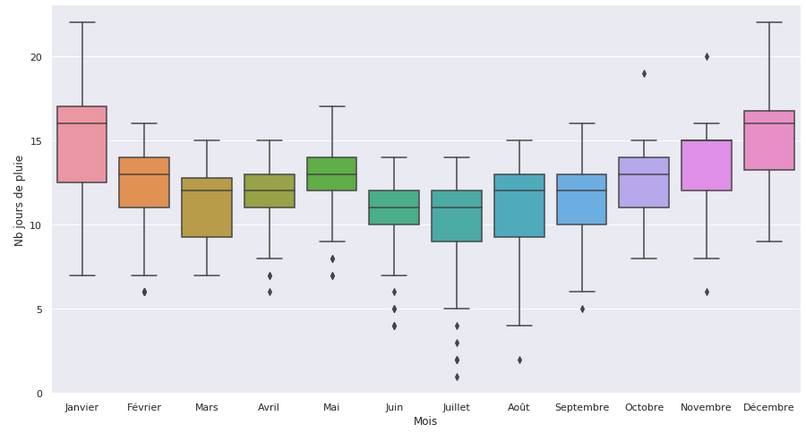

> conseil: utiliser le résultat des questions précédentes (celles avec `melt`)

In [27]:
# Distribution mensuelle des nombres de jours de pluie...
import seaborn as sns
sns.set()

# On commence par préparer le jeu de données : 

data2=data.iloc[:,range(12,24)] # On reccupère les colonnes correspondant à "jours de pluie"
graph = data2.reset_index().melt(id_vars='Ville', value_name="Jours_de_pluie") # On réordonne le jeu de données sous forme de lignes
graph.head() # Nouveau jeu de données pour les graphiques

,Ville,Grandeur,Mois,Jours_de_pluie
0,Ajaccio,Jours de pluie,Janvier,12.0
1,Angers,Jours de pluie,Janvier,16.0
2,Angoulème,Jours de pluie,Janvier,16.0
3,Besançon,Jours de pluie,Janvier,17.0
4,Biarritz,Jours de pluie,Janvier,16.0


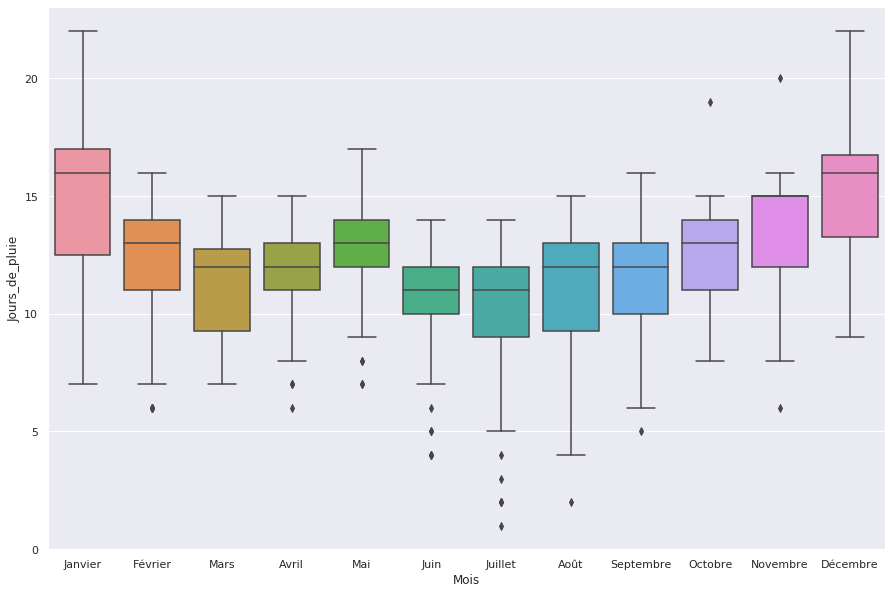

In [28]:
g=sns.boxplot(x='Mois', y='Jours_de_pluie', data=graph) # On trace les boites à moustache du nombre de jours de 
#pluie pour chaque mois
g.get_figure().set_size_inches(15,10) # On agrandis la figure

Sophistiquez l'affichage précédent pour que les distributions se fassent en fonction de la zone géographique. Le résultat doit ressembler à:

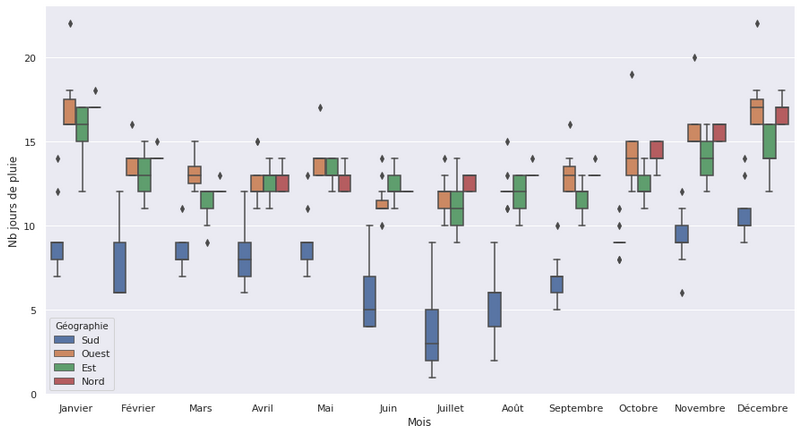

> _conseil_: utilisez le paramètre `by` de [`boxplot`](https://seaborn.pydata.org/generated/seaborn.boxplot.html#seaborn.boxplot) 

In [29]:
# On a le tableau avec les jours de pluie par mois auquel il faudra ajouter la zone géographique...
graph.head() 

,Ville,Grandeur,Mois,Jours_de_pluie
0,Ajaccio,Jours de pluie,Janvier,12.0
1,Angers,Jours de pluie,Janvier,16.0
2,Angoulème,Jours de pluie,Janvier,16.0
3,Besançon,Jours de pluie,Janvier,17.0
4,Biarritz,Jours de pluie,Janvier,16.0


In [30]:
# Pour cela on réccupère le tableau donnant la correspondance ville / région
graph2 = data.reset_index().melt(id_vars='Ville',value_vars=[("Géographie")],col_level=0) 
graph2.head() # Nouveau jeu de données pour les graphiques

,Ville,Grandeur,value
0,Ajaccio,Géographie,Sud
1,Angers,Géographie,Ouest
2,Angoulème,Géographie,Ouest
3,Besançon,Géographie,Est
4,Biarritz,Géographie,Ouest


In [31]:
# On peut maintenant fusionner les deux graphiques grâce à la colonne ville (pour chaque ville on connait la région) 
df=pandas.merge(graph,graph2, on=['Ville'])
df=df.rename(columns={df.columns[5]:"Région"})
df.head() # On a maintenant un tableau avec la ville, le mois, les précipitations et la région

,Ville,Grandeur_x,Mois,Jours_de_pluie,Grandeur_y,Région
0,Ajaccio,Jours de pluie,Janvier,12.0,Géographie,Sud
1,Ajaccio,Jours de pluie,Février,10.0,Géographie,Sud
2,Ajaccio,Jours de pluie,Mars,9.0,Géographie,Sud
3,Ajaccio,Jours de pluie,Avril,9.0,Géographie,Sud
4,Ajaccio,Jours de pluie,Mai,8.0,Géographie,Sud


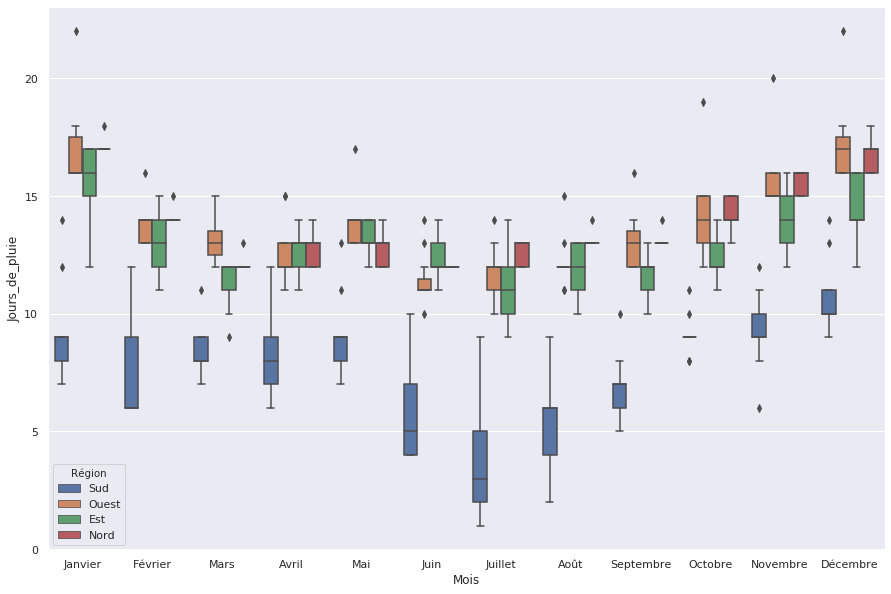

In [32]:
# On a plus qu'à tracer le graphique par région :
g=sns.boxplot(x='Mois', y='Jours_de_pluie', hue="Région",data=df) # On trace les boites à moustache du nombre de 
#jours de pluie pour chaque mois et chaque région
g.get_figure().set_size_inches(15,10) # On agrandis la figure

Enfin, affichez la distribution marginale des précipitations en fonction de la zone géographique.

Le résultat doit ressembler à:


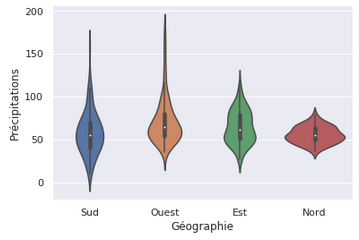

In [37]:
# On procède de la même façon sauf que cette fois on reccupère les données de précipitation (et pas jours de pluie)
data2=data.iloc[:,range(12)] # On reccupère les colonnes correspondant à "précipitation"
graph3 = data2.reset_index().melt(id_vars='Ville', value_name="Précipitations") # on re-ordonne le tableau
df2=pandas.merge(graph3,graph2, on=['Ville']) # On le fusionne avec le tableau des régions correspondantes
df2=df2.rename(columns={df2.columns[5]:"Région"})
df2.head() # Tableau pour le graph

,Ville,Grandeur_x,Mois,Précipitations,Grandeur_y,Région
0,Ajaccio,Précipitations,Janvier,78.0,Géographie,Sud
1,Ajaccio,Précipitations,Février,69.0,Géographie,Sud
2,Ajaccio,Précipitations,Mars,51.0,Géographie,Sud
3,Ajaccio,Précipitations,Avril,39.0,Géographie,Sud
4,Ajaccio,Précipitations,Mai,43.0,Géographie,Sud


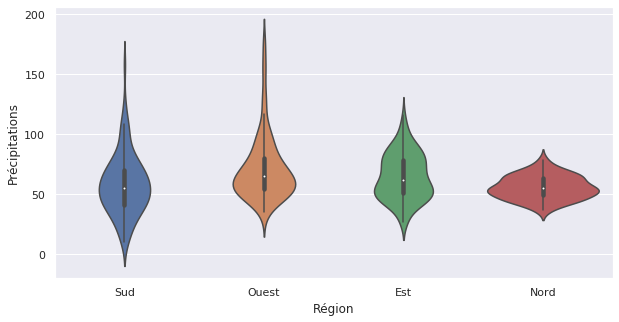

In [34]:
g=sns.violinplot(x='Région', y='Précipitations',data=df2) # On trace les boites à moustache du nombre de jours de 
#pluie pour chaque mois
g.get_figure().set_size_inches(10,5) # On agrandi la figure

## b. Point bonus

Réalisez toute sorte d'affichage sur ces données que vous pourriez trouver joli et utile. La qualité des affichages et la difficulté pour les réalisée sera prise en compte dans la notation !


Ci-dessous, un exemple, mais soyez créatifs !!

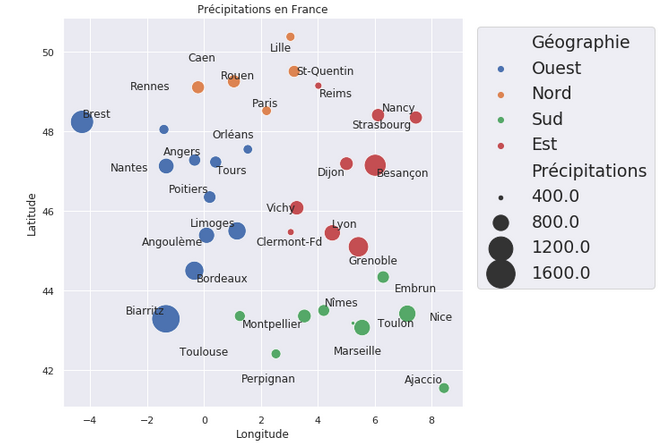

In [157]:
import matplotlib.pyplot as plt

liste=[]
for i in range(34):
  a=(1/51)*i
  
  liste.append(a)
print(liste)


[0.0, 0.0196078431372549, 0.0392156862745098, 0.058823529411764705, 0.0784313725490196, 0.09803921568627451, 0.11764705882352941, 0.13725490196078433, 0.1568627450980392, 0.1764705882352941, 0.19607843137254902, 0.21568627450980393, 0.23529411764705882, 0.2549019607843137, 0.27450980392156865, 0.29411764705882354, 0.3137254901960784, 0.3333333333333333, 0.3529411764705882, 0.37254901960784315, 0.39215686274509803, 0.4117647058823529, 0.43137254901960786, 0.45098039215686275, 0.47058823529411764, 0.49019607843137253, 0.5098039215686274, 0.5294117647058824, 0.5490196078431373, 0.5686274509803921, 0.5882352941176471, 0.6078431372549019, 0.6274509803921569, 0.6470588235294118]


34

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.


([<matplotlib.patches.Wedge at 0x7f97114669b0>,
 [Text(1.0977366407169895, 0.07052848805538944, 'Marseille'),
  Text(1.0979401418976125, 0.21920120260688908, 'Clermont-Fd'),
  Text(1.075883840939681, 0.374548182025734, 'Reims'),
  Text(1.0289943349022819, 0.5329565001548909, 'Lille'),
  Text(0.9547532028820348, 0.6907581497125189, 'Orléans'),
  Text(0.8549067673182932, 0.8393047012352366, 'Paris'),
  Text(0.7308548686892299, 0.9739176149833417, 'Perpignan'),
  Text(0.5841817193219921, 1.090656413008236, 'Rennes'),
  Text(0.4153703678768256, 1.1862425626764745, 'Ajaccio'),
  Text(0.22757262145028115, 1.2560206465643806, 'Toulouse'),
  Text(0.023869244299845032, 1.2958586186176646, 'Nîmes'),
  Text(-0.19111736534385565, 1.3017313569233517, 'St-Quentin'),
  Text(-0.40837657814437234, 1.2713138680302087, 'Tours'),
  Text(-0.6215417314465659, 1.2039290674319576, 'Angers'),
  Text(-0.8248746945516384, 1.099481213738939, 'Embrun'),
  Text(-1.0118366559158196, 0.9590362848119574, 'Poitiers'),


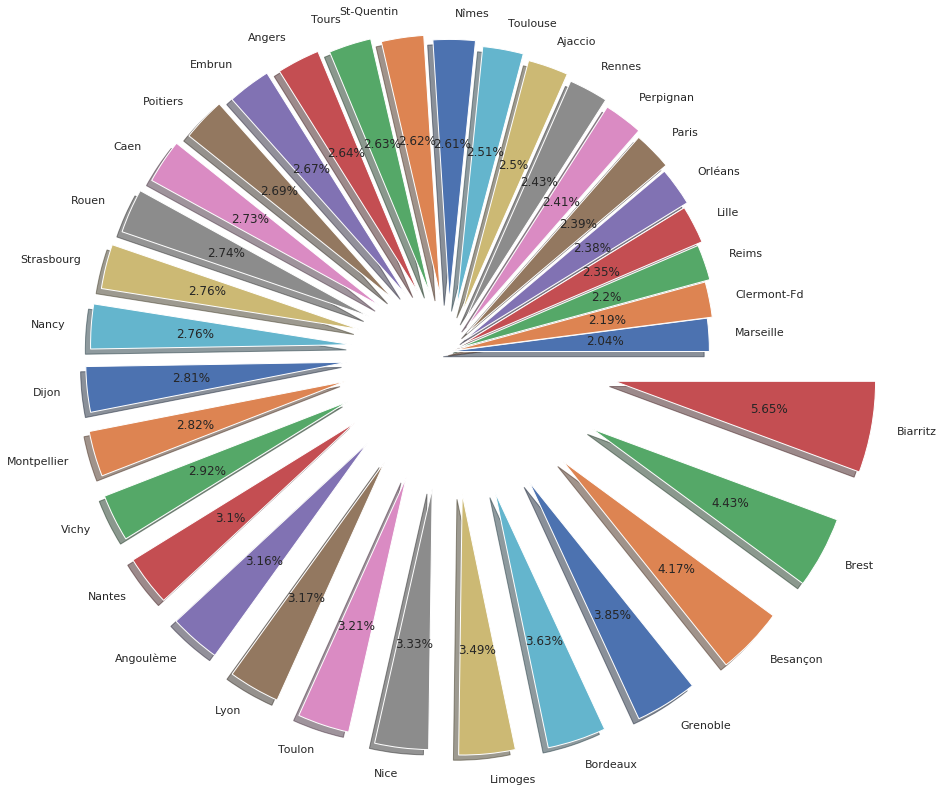

In [163]:
import matplotlib.pyplot as plt


#voila un graphique que je trouve assez utilie, peut être beau mais surtout original! 
# j'ai nommé le graphique escargot!


plt.figure(figsize=(12,12)) 


b=data.T.iloc[:12,:].mean()





d=pandas.DataFrame(b)
d.columns = ['test']
e=d.sort_values(by='test') 


plt.pie(e,labels=e.index,shadow=True,autopct = lambda x: str(round(x,2))+'%',explode=liste)





